Name: Anuj 201916004
Assingment no 1

      TMAX  TMIN
0      339   239
1      228   167
2      245   154
3      239   144
4      232   142
...    ...   ...
4673   313   128
4674   323   152
4675   332   188
4676   219   108
4677   254   105

[4621 rows x 2 columns]


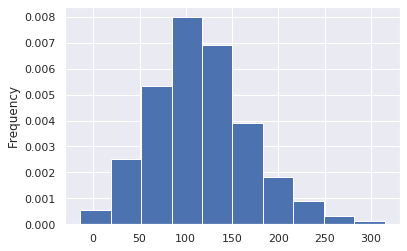

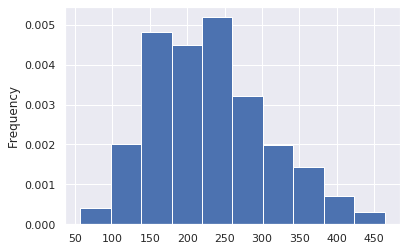

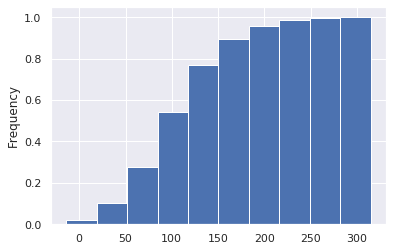

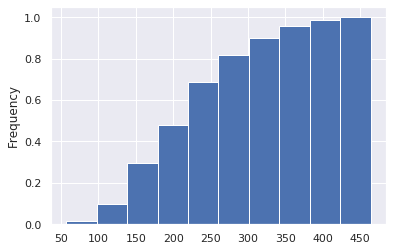

          TMAX      TMIN
TMAX  1.000000  0.715103
TMIN  0.715103  1.000000


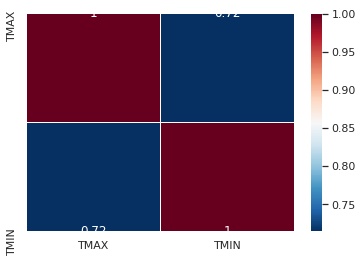

In [6]:
import pandas as pd
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
sns.set()



new_data=pd.read_excel('/home/shanks/Downloads/Adelaide_Temperature.xls')
#print(data)

new_data.drop(["STATION","STATION_NAME","DATE"], axis=1 ,inplace=True)
new_data=new_data.loc[(new_data['TMIN']!=-9999)]
new_data=new_data.loc[(new_data['TMAX']!=-9999)]

new_data.div(10)

x=new_data['TMAX']
y=new_data['TMIN']


print(new_data)


new_data.TMIN.plot(kind="hist",density=1)
plt.show()

new_data.TMAX.plot(kind="hist",density=1)
plt.show()

new_data.TMIN.plot(kind="hist",density=1,cumulative=True)
plt.show()

new_data.TMAX.plot(kind="hist",density=1,cumulative=True)
plt.show()

pearsoncorr = new_data.corr(method='pearson')
print(pearsoncorr)

sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

# Create new dataframe consisting of two columns name_X, name_y
def extract_from_dataset(dataset, name_X, name_Y):
    return dataset[[name_X, name_Y]].copy()

#Create a dictionary containing intervals (v) and theirs number (k)
def intervals_d(df, n_slices, name_X):
    out, bins = pd.qcut(df[name_X], n_slices, retbins = True)
    intervals = [pd.Interval(left = bins[i], right = bins[i+1], closed = 'right')
                 for i in range(len(bins) - 1)]
    intervals_dict = dict(zip(range(1, len(bins)), intervals))
#     print(intervals_dict)
    return intervals_dict
    

# Check whether x belongs to an interval from intervals dictionary                
def set_interval(x, intervals_dict):
    for k,v in intervals_dict.items():
        if x in v:
            return k

# Smooth X and Y using mean values
def smooth(df, name_X, name_Y, intervals_dict):
    df['X_Interval'] = df[name_X].apply(lambda x: set_interval(x, intervals_dict))
    smoothed_df = df.groupby(by = 'X_Interval').apply(np.mean)[[name_X, name_Y]]
    smoothed_df = smoothed_df.reset_index()
    smoothed_df['X_Interval'] = smoothed_df['X_Interval'].astype(dtype = 'int32')
    df = df[[name_X, name_Y]]
    return smoothed_df

# Plot raw and smoothed scatterplots
def scatterplots(df, name_X, name_Y, n_slices):
    fig = plt.figure(figsize=(18, 18))
    
    # Raw scatterplot
    ax = fig.add_subplot(221)
    plt.grid()
    plt.scatter(df[name_X], df[name_Y])
    plt.xlabel(name_X)
    plt.ylabel(name_Y)
    plt.axis('tight')
    
    # Smoothed scatterplot
    ax = fig.add_subplot(222)
    intervals_dict = intervals_d(df, n_slices, name_X)
    smoothed_df = smooth(df, name_X, name_Y, intervals_dict)
    Xmin = smoothed_df[name_X].min()
    Xmax = smoothed_df[name_X].max()
    ymin = smoothed_df[name_Y].min()
    ymax = smoothed_df[name_Y].max()
    ymedial = smoothed_df[name_Y].median()
    plt.grid()
    plt.plot(smoothed_df[name_X], smoothed_df[name_Y], marker='o')
    plt.xlabel('Smoothed ' + name_X)
    plt.ylabel('Smoothed ' + name_Y)
    plt.axis('tight')
    
    #Plot point numbers
    for i in smoothed_df.index.tolist():
        ax.annotate(str(smoothed_df['X_Interval'].iloc[i]),
                               xy = (smoothed_df[name_X].iloc[i], smoothed_df[name_Y].iloc[i]))                             
    
    plt.show()




Scatter plot

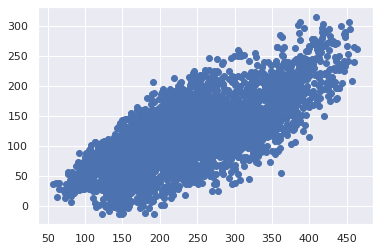

In [7]:
plt.scatter(x, y,linestyle='-', marker='o')
plt.show()

R Square Interpretation

In [8]:
def r2_score_from_scratch(ys_orig, ys_line):
    y_mean_line = [ys_orig.mean() for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr / squared_error_y_mean)

def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

0.5113728569499925


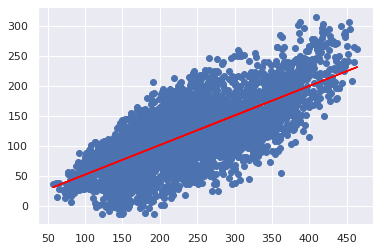

In [9]:
X = np.array(new_data['TMAX']).reshape(-1, 1)
y = new_data['TMIN']
rf = LinearRegression()
rf.fit(X, y)
y_pred = rf.predict(X)
plt.scatter(new_data['TMAX'], new_data['TMIN'])
plt.plot(X, y_pred, color='red')
r_squared = r2_score_from_scratch(y, y_pred)
print(r_squared)

Un_Smoothed Sccater plot

463


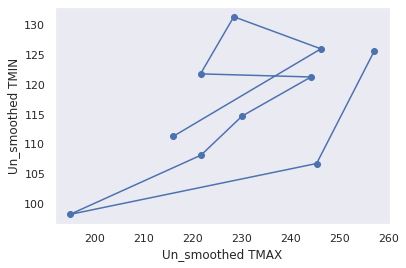

In [10]:
row_count=new_data.shape[0]
j=math.ceil(row_count/10)
print(j)

min_mean=[]
max_mean=[]

for i in range(0,row_count,j):
    df_final = new_data.iloc[i:i+j]
    min_mean.append(df_final['TMIN'].mean())
    max_mean.append(df_final['TMAX'].mean())
#     df_min.drop(df_min.index,inplace=True)
#     df_max.drop(df_max.index,inplace=True)

# merged_list = tuple(zip(max_mean,min_mean))
# x_val = [x[0] for x in merged_list]
# y_val = [x[1] for x in merged_list]

# print(max_mean)
# print(min_mean)

plt.grid()
plt.plot(max_mean,min_mean,marker='o')
plt.xlabel('Un_smoothed TMAX')
plt.ylabel('Un_smoothed TMIN')
plt.axis('tight')
plt.show()



Smoothed sccater plot

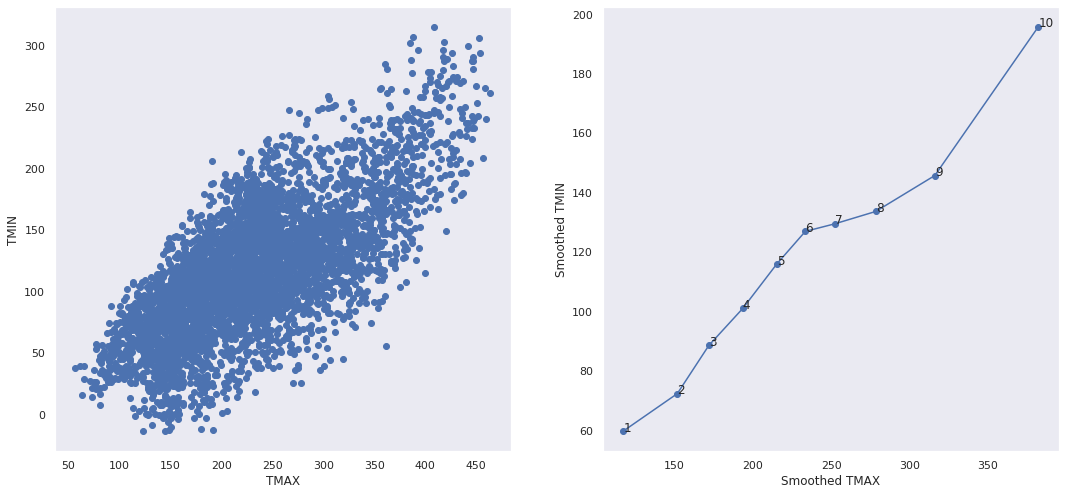

In [11]:
df = extract_from_dataset(new_data, 'TMAX', 'TMIN')
scatterplots(df, 'TMAX', 'TMIN', n_slices = 10)